In [20]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [23]:
credit_G = pd.read_csv("german_credit.csv")
G_credit = pd.read_csv("german_credit.csv")

In [24]:
credit_G.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [25]:
from sklearn.model_selection import train_test_split
independent= credit_G.iloc[:,1:]
dependent= credit_G.iloc[:,0]

X1_train, X1_test, y1_train, y1_test = train_test_split(independent, dependent, test_size=0.5,random_state=5)
X1_train.head(3)

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
34,>= 200 DM / salary assignments for at least 1 ...,12,existing credits paid back duly till now,radio/television,1474,... < 100 DM,... < 1 year,4,female : divorced/separated/married,none,1,if not A121 : building society savings agreeme...,33,bank,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
552,< 0 DM,48,existing credits paid back duly till now,domestic appliances,6999,... < 100 DM,4 <= ... < 7 years,1,male : married/widowed,guarantor,1,real estate,34,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
170,< 0 DM,15,no credits taken/ all credits paid back duly,car (new),950,... < 100 DM,.. >= 7 years,4,male : single,none,3,"if not A121/A122 : car or other, not in attrib...",33,none,rent,2,skilled employee / official,2,none,yes


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [26]:
# Print Shape of model data
G_credit.shape

(1000, 21)

In [27]:
G_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [28]:
# Lets build a Ensemble model but need to modify the dataset first
dummy = pd.get_dummies(data=G_credit, columns=['account_check_status', 'credit_history', 'purpose','savings', 'present_emp_since','personal_status_sex', 'other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])
dummy.head(3)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1


In [29]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

In [30]:
G_credit= dummy

### Check for highly correlated variables but don't required any treatment for this use case

In [31]:
print(G_credit.corr())

                                                     default  \
default                                             1.000000   
duration_in_month                                   0.214927   
credit_amount                                       0.154739   
installment_as_income_perc                          0.072404   
present_res_since                                   0.002967   
age                                                -0.091127   
credits_this_bank                                  -0.045732   
people_under_maintenance                           -0.003015   
account_check_status_0 <= ... < 200 DM              0.119581   
account_check_status_< 0 DM                         0.258333   
account_check_status_>= 200 DM / salary assignm... -0.044009   
account_check_status_no checking account           -0.322436   
credit_history_all credits at this bank paid ba...  0.134448   
credit_history_critical account/ other credits ... -0.181713   
credit_history_delay in paying off in th

### Drop the original variables which are converted to dummy

In [ ]:
### Dropping orginal variables not required refer dummy.info() above code..orginal object variables already removed.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [32]:
from sklearn.model_selection import train_test_split
independent= G_credit.iloc[:,1:]
dependent= G_credit.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3,random_state=5)
X_train.head(3)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
904,24,1278,4,1,36,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
132,15,2708,2,3,27,2,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
942,24,929,4,2,31,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [35]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
rfcl.score(X_test , y_test)

0.7533333333333333

In [39]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[195  23]
 [ 51  31]]


### Q6 Show the list of the features importance( 1 Marks)

In [36]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                         Imp
duration_in_month                                   0.078668
credit_amount                                       0.099271
installment_as_income_perc                          0.036973
present_res_since                                   0.034215
age                                                 0.073771
credits_this_bank                                   0.019270
people_under_maintenance                            0.012319
account_check_status_0 <= ... < 200 DM              0.016349
account_check_status_< 0 DM                         0.035063
account_check_status_>= 200 DM / salary assignm...  0.009712
account_check_status_no checking account            0.053369
credit_history_all credits at this bank paid ba...  0.007233
credit_history_critical account/ other credits ...  0.023325
credit_history_delay in paying off in the past      0.009670
credit_history_existing credits paid back duly ...  0.014536
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [71]:
# Use below values
num_folds = 10
seed = 77
cv = KFold(10,random_state=77)

In [7]:
#Validate the Random Forest model build above using k fold

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfcl, X_train, y_train, cv=cv)

array([ 0.78571429,  0.74285714,  0.8       ,  0.82857143,  0.84285714,
        0.78571429,  0.68571429,  0.77142857,  0.71428571,  0.75714286])

In [8]:
#Calculate Mean score

In [74]:
print (np.mean(cross_val_score(rfcl, X_train, y_train, cv=10)))

0.761428279824


In [9]:
# Calculate score standard deviation using std()

In [75]:
print (np.std(cross_val_score(rfcl, X_train, y_train, cv=10)))

0.0238469086175


# Q8 Print the confusion matrix( 1 Marks)

In [76]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[195  23]
 [ 51  31]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [77]:
from sklearn import metrics
rfcl.score(X_test , y_test)

0.7533333333333333

In [78]:
#percentage of correct predictions = 0.753*100 = 75.3
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[195  23]
 [ 51  31]]


In [79]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_predict))

0.378048780488
0.378048780488


In [80]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_predict))

0.574074074074
0.574074074074


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [10]:
#Hint: Use roc_curve

In [81]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rfcl.predict_proba(X_test)[:,1]

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

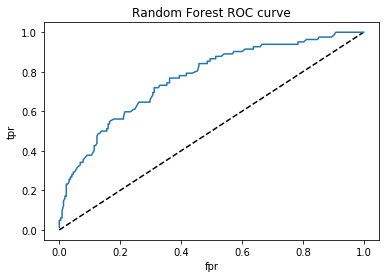

In [82]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [83]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.63627209666592066

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [13]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []